<a href="https://colab.research.google.com/github/dwkim2396/DataAnalyticsBootCamp/blob/main/1_Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
res = pd.read_csv('/_WITH_restaurant_cnt_AS_SELECT_restaurant_name_COUNT_1_AS_cnt_FR_202411141042.csv')

In [ ]:
res.head(2)

,restaurant_name,cnt,rating
0,Cake Waves,3,4.9
1,Hangyo Ice Cream,1,4.9


In [ ]:
res_1 = res[res['cnt'] == 1]
res_2 = res[res['cnt'] == 2]
res_ov3 = res[res['cnt'] >= 3]

In [ ]:
res_2 = res_2.groupby('restaurant_name').mean().reset_index()
res_ov3 = res_ov3.groupby('restaurant_name').mean().reset_index()

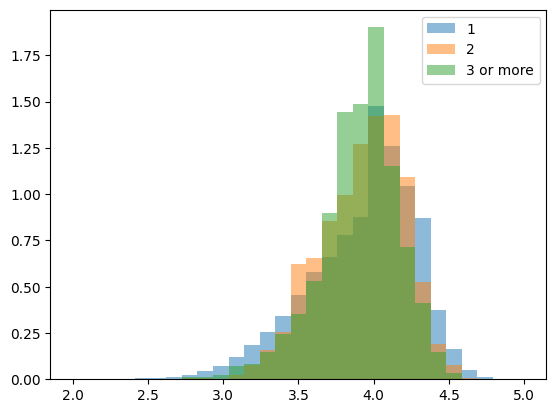

In [ ]:
bins = np.linspace(2, 5, 30)

plt.hist(res_1['rating'], bins, alpha = 0.5, label = '1', density=True)
plt.hist(res_2['rating'], bins, alpha = 0.5, label = '2', density=True)
plt.hist(res_ov3['rating'], bins, alpha = 0.5, label = '3 or more', density=True)

plt.legend(loc = 'upper right')
plt.show()

In [ ]:
data = pd.read_csv('/_WITH_store_counts_AS_SELECT_restaurant_name_COUNT_1_AS_cnt_FROM_202411141125.csv', encoding='unicode_escape')

In [ ]:
data.head(2)

,restaurant_name,rating,average_price,average _delivery_time,south_indian_or_not,north_indian_or_not,fast_food_or_not,street_food,biryani_or_not,bakery_or_not,location,cnt
0,# Momo,4.2,200,34,0,0,0,0,0,0,Durgapur,1
1,#99,4.1,100,31,0,0,0,0,0,0,Bareilly,1


In [ ]:
data_1 = data[data[['cnt']] == 1]
data_2 = data[data[['cnt']] == 2]
data_ov3 = data[data[['cnt']] > 2]

In [ ]:
print(data.columns)

Index(['restaurant_name', 'rating', 'average_price', 'average _delivery_time',
       'south_indian_or_not', 'north_indian_or_not', 'fast_food_or_not',
       'street_food', 'biryani_or_not', 'bakery_or_not', 'location', 'cnt'],
      dtype='object')


In [ ]:
print(f"점포 수 1개일 때 가격과 별점의 상관계수: {np.corrcoef(data_1['rating'], data_1['average_price'])[0, 1]}")
print(f"점포 수 1개일 때 배달 시간과 별점의 상관계수: {np.corrcoef(data_1['rating'], data_1['average _delivery_time'])[0, 1]}")

print("###")

print(f"점포 수 2개일 때 가격과 별점의 상관계수: {np.corrcoef(data_2['rating'], data_2['average_price'])[0, 1]}")
print(f"점포 수 2개일 때 배달 시간과 별점의 상관계수: {np.corrcoef(data_2['rating'], data_2['average _delivery_time'])[0, 1]}")

print("###")

print(f"점포 수 3개 이상일 때 가격과 별점의 상관계수: {np.corrcoef(data_ov3['rating'], data_ov3['average_price'])[0, 1]}")
print(f"점포 수 3개 이상일 때 배달 시간과 별점의 상관계수: {np.corrcoef(data_ov3['rating'], data_ov3['average _delivery_time'])[0, 1]}")

점포 수 1개일 때 가격과 별점의 상관계수: nan
점포 수 1개일 때 배달 시간과 별점의 상관계수: nan
###
점포 수 2개일 때 가격과 별점의 상관계수: nan
점포 수 2개일 때 배달 시간과 별점의 상관계수: nan
###
점포 수 3개 이상일 때 가격과 별점의 상관계수: nan
점포 수 3개 이상일 때 배달 시간과 별점의 상관계수: nan


In [ ]:
non_fast = data[data['fast_food_or_not'] == 0]
fast = data[data['fast_food_or_not'] == 1]

In [ ]:
print(f"Non-패스트 푸드점의 가격과 별점의 상관계수: {np.corrcoef([non_fast['rating'], non_fast['average_price']])[0, 1]}")
print(f"Non-패스트 푸드점의 배달 시간과 별점의 상관계수: {np.corrcoef([non_fast['rating'], non_fast['average _delivery_time']])[0, 1]}")

print("###")

print(f"패스트 푸드점의 가격과 별점의 상관계수: {np.corrcoef([fast['rating'], fast['average_price']])[0, 1]}")
print(f"패스트 푸드점의 배달 시간과 별점의 상관계수: {np.corrcoef([fast['rating'], fast['average _delivery_time']]) [0, 1]}")

Non-패스트 푸드점의 가격과 별점의 상관계수: -0.005629491775957262
Non-패스트 푸드점의 배달 시간과 별점의 상관계수: -0.09544291128704012
###
패스트 푸드점의 가격과 별점의 상관계수: -0.007056409049082113
패스트 푸드점의 배달 시간과 별점의 상관계수: -0.10544509659775646


In [ ]:
big = pd.read_csv("/big_202411141201.csv", encoding = 'unicode_escape')
small = pd.read_csv("/small_202411141202.csv", encoding = 'unicode_escape')

In [ ]:
big_cities = data[data['location'].isin(big['location'])]
print(f"대도시의 가격과 별점의 상관계수: {np.corrcoef(big_cities['rating'], big_cities['average_price']) [0, 1]}")
print(f"대도시의 배달 시간과 별점의 상관계수: {np.corrcoef(big_cities['rating'], big_cities['average _delivery_time']) [0, 1]}")

print("###")

small_cities = data[data['location'].isin(small['location'])]
print(f"소도시의 가격과 별점의 상관계수: {np.corrcoef(small_cities['rating'], small_cities['average_price']) [0, 1]}")
print(f"소도시의 배달 시간과 별점의 상관계수: {np.corrcoef(small_cities['rating'], small_cities['average _delivery_time']) [0, 1]}")

대도시의 가격과 별점의 상관계수: 0.02830076166765987
대도시의 배달 시간과 별점의 상관계수: -0.11178071119842663
###
소도시의 가격과 별점의 상관계수: -0.044593652468231694
소도시의 배달 시간과 별점의 상관계수: -0.23211928699070075


예상과 다르게, 소도시에서 가격과 배달 시간 모두에 대해 음의 상관관계가 대도시보다 강하게 나타났다.